## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
print(mouse_metadata.columns)
study_results.head(20)

mouse_study_data = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')
print(mouse_study_data.columns)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


In [2]:
# Checking the number of mice in the DataFrame.
print("Number of unique mice:  " + str(mouse_study_data['Mouse ID'].nunique()))
print("Number of mice in data frame:  " + str(mouse_study_data['Mouse ID'].count()))

Number of unique mice:  249
Number of mice in data frame:  1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_data.duplicated(subset=['Mouse ID','Timepoint'])

if duplicate_mice.any():
        print("Duplicate Mouse ID(s) is(are)  >:" + mouse_study_data.loc[duplicate_mice]['Mouse ID'].unique())
        duplicate_list = mouse_study_data.loc[duplicate_mice]['Mouse ID'].tolist()

['Duplicate Mouse ID(s) is(are)  >:g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_temp = mouse_study_data.set_index('Mouse ID')


mouse_study_temp.loc[duplicate_list]



,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
...,...,...,...,...,...,...,...
g989,20,55.326122,1,Propriva,Female,21,26
g989,20,54.657650,1,Propriva,Female,21,26
g989,25,56.045564,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
duplicate_mice2 = clean_mouse_data.duplicated(subset=['Mouse ID','Timepoint'])

if ~duplicate_mice2.any():
        print("No duplicates")

print("Number of unique mice:  " + str(clean_mouse_data['Mouse ID'].nunique()))
print("Number of mice in data frame:  " + str(clean_mouse_data['Mouse ID'].count()))

No duplicates
Number of unique mice:  249
Number of mice in data frame:  1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
regimen_summary_grp =  clean_mouse_data.groupby('Drug Regimen')
regimen_summ_grp_mean = regimen_summary_grp['Tumor Volume (mm3)'].mean()
regimen_summ_grp_median = regimen_summary_grp['Tumor Volume (mm3)'].median()
regimen_summ_grp_var = regimen_summary_grp['Tumor Volume (mm3)'].var()
regimen_summ_grp_std = regimen_summary_grp['Tumor Volume (mm3)'].std()
regimen_summ_grp_sem = regimen_summary_grp['Tumor Volume (mm3)'].sem()
regimen_summaryA = pd.DataFrame({'Mean' : regimen_summ_grp_mean,
                                'Median' : regimen_summ_grp_median,
                                'variance' : regimen_summ_grp_var,
                                'Standard Deviation' : regimen_summ_grp_std,
                                'SEM' : regimen_summ_grp_sem})
regimen_summaryA

,Mean,Median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

regimen_summary = clean_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})
regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Drug Regimen  Timepoint
Capomulin     0            25
              5            25
              10           25
              15           24
              20           23
                           ..
Zoniferol     25           16
              30           15
              35           14
              40           14
              45           14
Name: Mouse ID, Length: 100, dtype: int64


([], <a list of 0 Text xticklabel objects>)

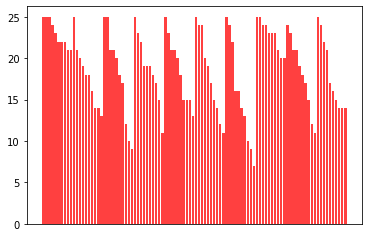

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
clean_grp = clean_mouse_data.groupby(['Drug Regimen','Timepoint'])
x_axis = np.arange(0, len(clean_grp), 1)
y_axis = clean_grp['Mouse ID'].count()
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
print(x_axis)
print(y_axis)
plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
tick_locations = []
plt.xticks(tick_locations, clean_mouse_data[['Drug Regimen','Timepoint']].keys() )

<BarContainer object of 10 artists>

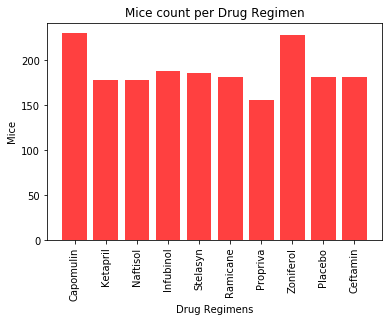

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
clean_grp = clean_mouse_data.groupby(['Drug Regimen'])
x_axis = np.arange(0, len(clean_grp), 1)
y_axis = clean_grp['Mouse ID'].count()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_mouse_data['Drug Regimen'].unique(),rotation=90 )
plt.title("Mice count per Drug Regimen")
plt.ylabel("Mice")
plt.xlabel("Drug Regimens")
plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")


Text(0.5, 1.0, 'Mice / Drug Regimen Relationship')

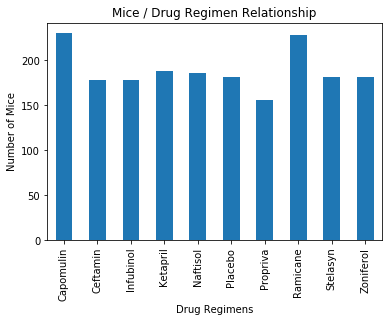

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

clean_grp_bar = clean_grp["Mouse ID"].count()
Multi_plot = clean_grp_bar.plot(kind="bar")

# Set the xlabel and ylabel using class methods
Multi_plot.set_xlabel("Drug Regimens")
Multi_plot.set_ylabel("Number of Mice")
Multi_plot.set_title("Mice / Drug Regimen Relationship")


## Pie Plots

Text(0.5, 1.0, 'Gender Demographics')

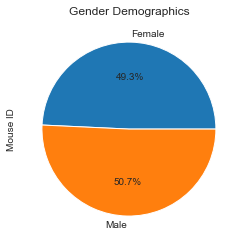

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_gender_grp = clean_mouse_data.groupby("Sex")

clean_grp_pie = clean_gender_grp["Mouse ID"].count()
gender_plot = clean_grp_pie.plot(kind="pie",autopct="%1.1f%%")
gender_plot.set_title("Gender Demographics")

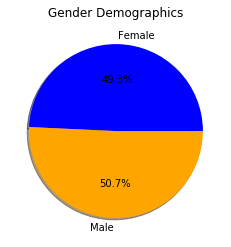

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Gender Demographics")
colors=["blue","orange"]
labels = ["Female","Male"]

plt.pie(clean_grp_pie,colors=colors,labels = labels, autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

<function matplotlib.pyplot.show(*args, **kw)>

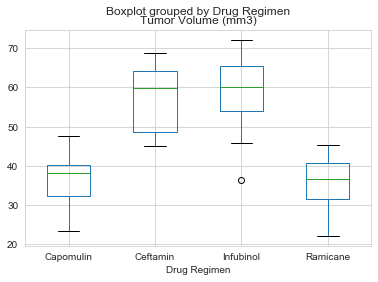

In [91]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#timepoint = clean_mouse_data.loc[clean_mouse_data['Timepoint'] == max_timepoint]
timepoint = clean_mouse_data.copy()
timepoint = timepoint.loc[timepoint['Drug Regimen'].isin(["Ramicane","Capomulin","Infubinol","Ceftamin"]),]

max_timepoint = timepoint.groupby('Mouse ID').last()

tumor_plot = max_timepoint.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = True,widths=0.5) 

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

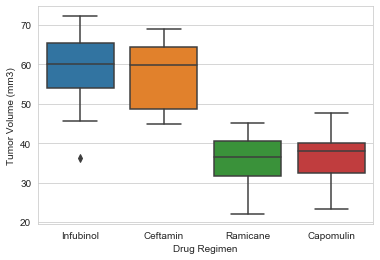

In [86]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Drug Regimen', y = 'Tumor Volume (mm3)', data = max_timepoint)


## Line and Scatter Plots

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601' 'l509' 'l897' 'w150' 's710' 'w914'
 'm601' 'u364' 'b742' 'v923' 'f966' 'x401' 'j119' 'i557' 'y793' 'g316'
 'r157' 'r944' 'r554' 's185' 'i738' 'j246' 't565' 'b128' 'g288' 'm957'
 'r554' 'u364' 'v923' 'g288' 's710' 'l509' 'i738' 'm957' 'j119' 'i557'
 'g316' 'y793' 'f966' 'm601' 'l897' 'r944' 'w914' 'w150' 't565' 's185'
 'b128' 'b742' 'x401' 'j246' 'r157' 's185' 'b128' 'g288' 'i738' 'm957'
 'r944' 'y793' 't565' 'j246' 'r157' 'g316' 'r554' 'j119' 'b742' 'x401'
 'i557' 'u364' 'l897' 'm601' 'w914' 's710' 'l509' 'f966' 'v923' 'u364'
 'f966' 'b128' 'b742' 'r554' 'm957' 's185' 'l509' 'w914' 'l897' 'r944'
 'j119' 'g316' 'j246' 'v923' 't565' 'y793' 'i557' 'g288' 'i738' 'm601'
 's710' 'x401' 'r944' 's710' 'j119' 't565' 'l509' 'i557' 'x401' 'l897'
 'w914' 'm601' 's185' 'u364' 'b742' 'v923' 'r554' 'g288' 'g316' 'b128'
 'm957

Text(0.5, 1.0, 'Mouse ID: l897')

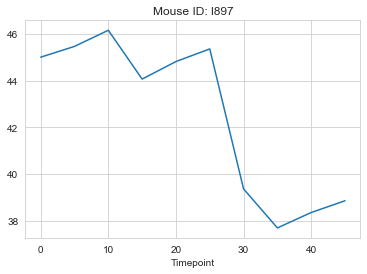

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
mouseids = capo_df['Mouse ID'].values
print(pd.Series(mouseids).values)
mouse = input("please enter a mouse ID: ")
mouse_df = capo_df.loc[capo_df['Mouse ID'] == mouse]

line_plot = mouse_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot();
line_plot.set_title(f'Mouse ID: {mouse}')
line_plot.xtitle

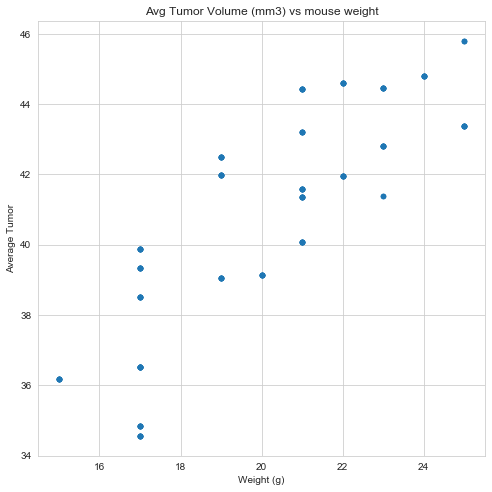

In [70]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regime

# Get the mean of the tumor size per mouse for the drug regiment Capomulin
tumor_mouse_mean = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# create a dataframe to merge it with the other data
df = pd.DataFrame(tumor_mouse_mean)

# rename the column
df = df.rename(columns = {'Tumor Volume (mm3)' : 'Average Tumor'})

# merge the 2 dataframes together
scatter_df = pd.merge(df,capo_df,how='left',on='Mouse ID')

# create a scatter plot of the data
scatter_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor", grid=True, figsize=(8,8), title="Avg Tumor Volume (mm3) vs mouse weight")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.83


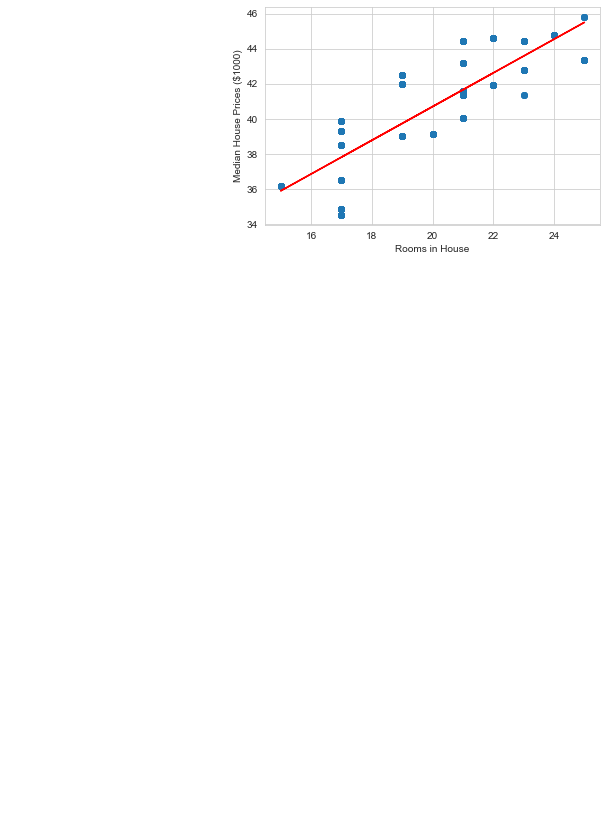

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from sklearn import datasets
from scipy.stats import linregress

mouse_weight = scatter_df.iloc[:,8]
average_tumor = scatter_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight,average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


x_values = scatter_df['Weight (g)']
y_values = scatter_df['Average Tumor']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

In [93]:
scatter_df

,Mouse ID,Average Tumor,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,41.963636,0,45.000000,0,Capomulin,Female,9,22
1,b128,41.963636,5,45.651331,0,Capomulin,Female,9,22
2,b128,41.963636,10,43.270852,0,Capomulin,Female,9,22
3,b128,41.963636,15,43.784893,0,Capomulin,Female,9,22
4,b128,41.963636,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
225,y793,38.506829,25,38.992734,2,Capomulin,Male,17,17
226,y793,38.506829,30,35.726023,2,Capomulin,Male,17,17
227,y793,38.506829,35,36.327870,2,Capomulin,Male,17,17
228,y793,38.506829,40,31.475411,2,Capomulin,Male,17,17
